In [159]:
#Ukljucenje
import numpy as np
import matplotlib.pyplot as plt

#Locale settings
import locale
# Set to German locale to get comma decimal separater
locale.setlocale(locale.LC_NUMERIC, "de_DE")

plt.rcParams['text.usetex'] = True 
plt.rcParams.update({'font.size': 10,'font.family': 'serif'})
plt.rcParams['figure.figsize'] = (.75*6.5, .75*4.5)

plt.rcParams['axes.formatter.use_locale'] = True

plt.rcParams['text.latex.preamble'] = r'\usepackage{icomma}\usepackage{upgreek}'

In [160]:
#tektronix tbs1052B-edu sampling rate 1GSPS

#8 - 2kHz
#6 - 1.4kHz
#4 - 925 kHz
#3 - 670Hz
#2 - 400Hz
#1 - 140Hz

fs = 1e9
fBase = 2000 #Hz
sampling_rate = 1/fBase
#Citanje iz csv fajla
import pandas as pd
data = pd.read_csv('arduinoData/csvData_8V.csv').values

In [161]:
#ogranicavanje niza sa donje strane
for i in range (0, len(data)):
    if data[i]<-1:
        data[i] = -1

In [162]:
#sluzi za brojanje duzine perioda
counter = 0
#trazi najmanju periodu/najvecu ucestanost signala
counter2 = 512
#niz frekvencija
freq = np.zeros(len(data))
for i in range (0, len(data)):
    #krece da broji impuls od nule
    if data[i]>-1 and data[i]<1:
        counter += 1
    if data[i]>1:
        counter += 1
    #krece da broji novi impuls
    if (counter-1) and data[i-1]>1:
        if data[i]>-1 and data[i]<1:
            freq[i] = counter - 1
            counter2 = min(counter, counter2)
            counter = 1
#ts - razmak izmedju dva odbirka
print(counter2)
ts = (1/fBase)/(counter2 - 1)
for i in range (0, len(freq)):
    freq[i] = 1/((freq[i]-1)*ts)
    if freq[i]<0:
        freq[i]=freq[i-1]

3


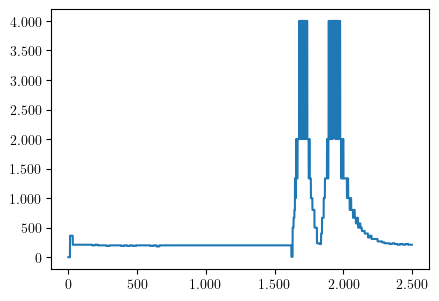

In [163]:
plt.plot(freq)

[2934.72841414   31.26328085]


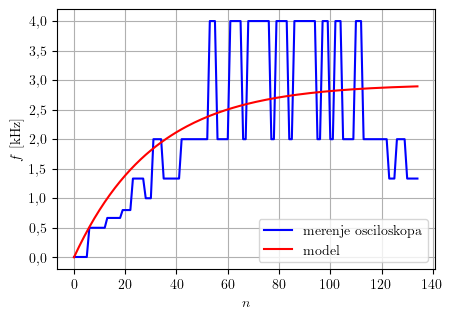

In [172]:
from scipy.optimize import curve_fit

#Odokativnom metodom odredjeno gde da se odsece niz-----------------------------------------------
#1625:1760 - 2000
#130:500   - 1400
#5:450     - 925
#460:1780  - 670
#460:1760  - 400
#500:1700  - 140

data_freq = freq[1625:1760]
t = np.arange(0, len(data_freq))

#Prvi parametar uvek x osa
def func(t, a, T):
    return a*(1-np.exp(-t/T))

plt.plot(t, data_freq/1000, 'b', label='merenje osciloskopa')

#Ako imamo predstavu koliko ce biti argumenti ovako mozemo da ubrzamo funkciju
initialGuess = [140, 300]

popt, pcov = curve_fit(func, t, data_freq, initialGuess)
print(popt)

plt.plot(t, func(t, *popt)/1000, 'r', label='model')
plt.xlabel('$n$')
plt.ylabel('$f$ [kHz]')
plt.grid()
plt.legend()
#plt.savefig('fig_osc/DCfit'+str(fBase)+'.pdf', format='pdf', bbox_inches='tight')

In [173]:
print('Tm = ', sampling_rate*popt[1],'s')

Tm =  0.01563164042383306 s
